In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from PIL import Image
                              #os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/AIUB/CVPR/Final/data'      #change path accordingly
class_names = sorted(os.listdir(base_path))
num_classes = len(class_names)
print("Group mates:", class_names)

x_data = []
y_data = []
target_size = (64, 64)

for idx, name in enumerate(class_names): #loop in file
    folder_path = os.path.join(base_path, name)
    print(f"Loading images from: {name}")
    for img_name in os.listdir(folder_path):  #loop in image
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path).convert('L')  # grayscale
            img = img.resize(target_size)
            img_array = np.array(img) / 255.0        # normalize
            x_data.append(img_array)
            y_data.append(idx)
        except:
            print(f"Skipped bad image: {img_path}")

x_data = np.array(x_data)
y_data = np.array(y_data)
x_data = x_data.reshape(-1, 64, 64, 1)  # add channel dimension

print(f"Total images loaded: {len(x_data)}")
print(f"x_data shape: {x_data.shape}, y_data shape: {y_data.shape}")

Group mates: ['21-45902-3', '22-46138-1', '22-46139-1', '22-46141-1', '22-46142-1', '22-46156-1', '22-46258-1', '22-46275-1', '22-46293-1', '22-46342-1', '22-46473-1', '22-46536-1', '22-46586-1', '22-46590-1', '22-46666-1', '22-46677-1', '22-46679-1', '22-46840-1', '22-46857-1', '22-46877-1', '22-46877-1 (1)', '22-46880-1', '22-46887-1', '22-46931-1', '22-46945-1', '22-46956-1', '22-46983-1', '22-47027-1', '22-47101-1', '22-47180-1 ', '22-47294-1', '22-47384-2', '22-47402-2', '22-47434-2', '22-47539-2', '22-47542-2', '22-47795-2', '22-47802-2', '22-47813-2', '22-47876-2', '22-47884-2', '22-47888-2', '22-47892-2', '22-47894-2', '22-47898-2', '22-47925-2', '22-47934-2', '22-47966-2', '22-47968-2', '22-48005-2', '22-48021-2', '22-48023-2', '22-48039-2', '22-48055-2', '22-48064-2', '22-48091-2', '22-48133-2 ', '22-48205-2', '22-48310-3', '22-48434-3', '22-48541-3', '22-48569-3', '22-48582-3', '22-48666-3', '22-48682-3', '22-48725-3', '22-48804-3', '22-48833-3', '22-48841-3', '22-48915-3', 

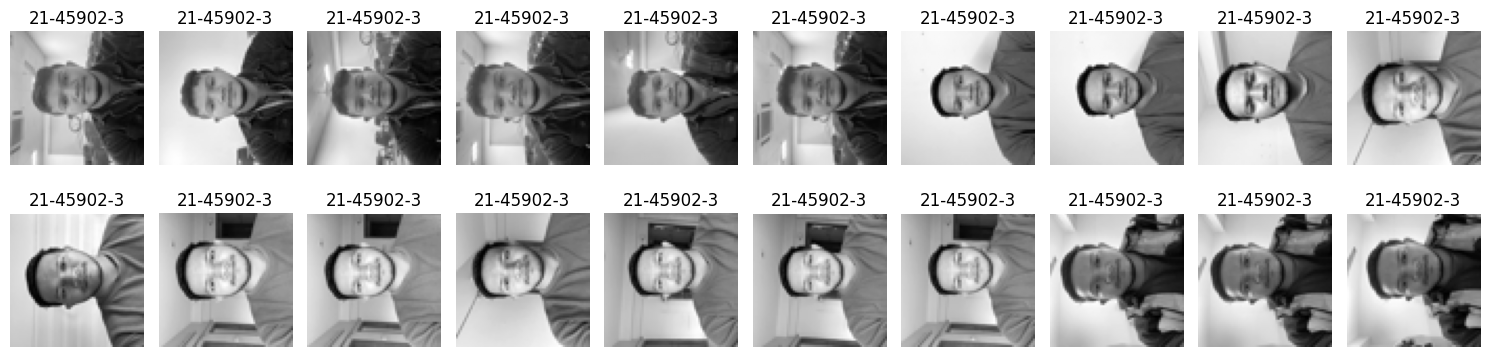

In [4]:
plt.figure(figsize=(15,4))
for i in range(min(20, len(x_data))):
    plt.subplot(2,10,i+1)
    plt.imshow(x_data[i].reshape(64,64), cmap='gray')
    plt.title(class_names[y_data[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
# ============================ Train-Test Split ============================
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)
print(f"Training samples: {len(x_train)}, Testing samples: {len(x_test)}")

# ============================ Data Augmentation ============================
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


Training samples: 1656, Testing samples: 414


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(64,64,1)),
    data_augmentation,  #  augmentation training

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',   #??
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 111)            │         7,215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,847 (2.49 MB)

 Trainable params: 652,847 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ============================ Early Stopping ============================
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# ============================ Train Model ============================
history = model.fit(
    x_train, y_train,
    epochs=20,             #  EarlyStopping
    batch_size=8,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# ============================ Evaluate Model ============================
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")



Epoch 1/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0192 - loss: 4.7012 - val_accuracy: 0.0483 - val_loss: 4.6039
Epoch 2/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0545 - loss: 4.5466 - val_accuracy: 0.0918 - val_loss: 4.2102
Epoch 3/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0920 - loss: 4.2492 - val_accuracy: 0.1763 - val_loss: 3.6692
Epoch 4/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1386 - loss: 3.7578 - val_accuracy: 0.2995 - val_loss: 3.0494
Epoch 5/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2119 - loss: 3.3219 - val_accuracy: 0.4034 - val_loss: 2.6460
Epoch 6/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3026 - loss: 2.9077 - val_accuracy: 0.4589 - val_loss: 2.2990
Epoch 7/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3289 - loss: 2.6827 - val_accuracy: 0.4807 - val_loss: 2.1555
Epoch 8/20
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3364 - loss: 2.5763 - val_accuracy: 0

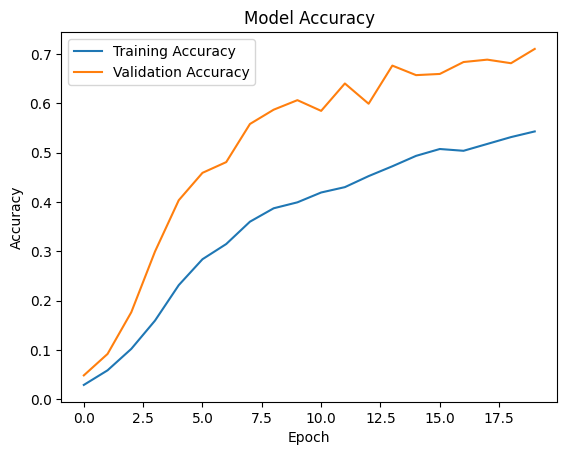

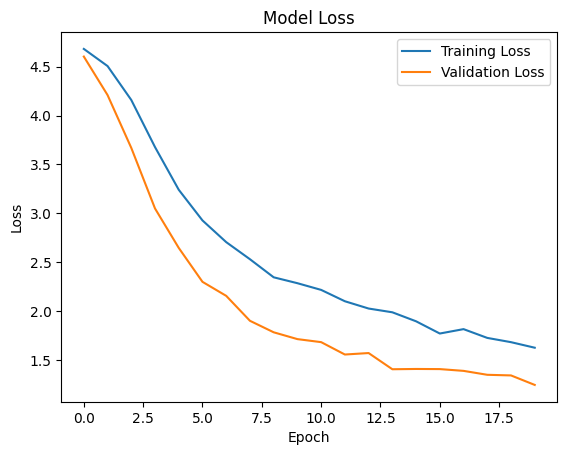

In [8]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# ============================ Save Model ============================
save_folder = '/content/drive/MyDrive/AIUB/CVPR/Final'     #change path accordingly
os.makedirs(save_folder, exist_ok=True)

model.save(os.path.join(save_folder, '22444_face_recognition_model.keras'))
print("Model saved successfully!")

Model saved successfully!
